# 신경망을 사용한 MNIST 손글씨 인식하기
* 미국 국립표준기술원(NIST)에서 고등학생과 인구조사국 직원 등이 쓴 손글씨를 수집하여 만든 70,000개의 숫자 손글씨 데이터셋

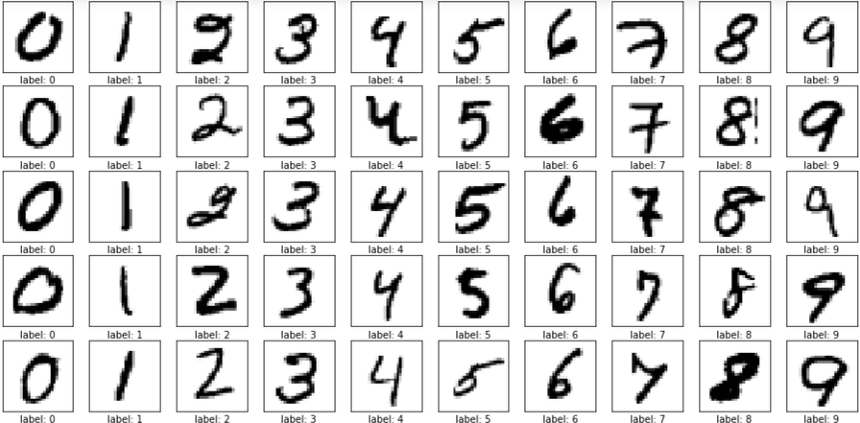
* 총 70000개의 데이터 
* 학습용데이터 60000
* 테스트용 데이터 10000
* 손글씨 한 장의 이미지는 28 x 28 = 784개의 픽셀로 구성

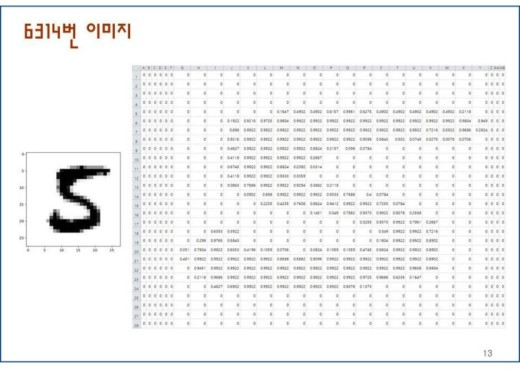

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = \
  tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [ ]:
x_train[0]

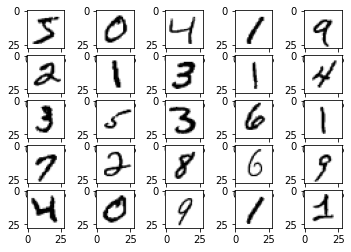

In [ ]:
fig, axs = plt.subplots(5,5)
for i in range(5):
  for j in range(5):
    axs[i, j].imshow(x_train[i*5+j], cmap='gray_r')
plt.show()

In [ ]:
y_train[0:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
dense1 = layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = layers.Dense(50, activation='relu')
dense3 = layers.Dense(10, activation='softmax')
model = models.Sequential([dense1, dense2, dense3])

# Loss 함수의 종류

## RMSE(Root Mean Squared Error)

 

MSE에 루트(√)를 씌운 것으로 MSE와 기본적으로 동일하다. MSE 값은 오류의 제곱을 구하기 때문에 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 은 값의 왜곡을 줄여준다.

 

## Binary Crossentropy
 

실제 레이블과 예측 레이블 간의 교차 엔트로피 손실을 계산한다. 레이블 클래스(0, 1로 가정)가 2개만 존재할 때 Binary Crossentropy를 사용하면 좋다. 

 

## Categorical Crossentropy


다중 분류 손실함수로 출력값이 one-hot encoding 된 결과로 나오고 실측 결과와의 비교시에도 실측 결과는 

one-hot encoding 형태로 구성된다.

예를 들면 출력 실측값이 아래와 같은 형태(one-hot encoding)로 만들어 줘야 하는 과정을 거쳐야 한다.
[[0 0 1]
 [0 1 0]
 [1 0 0]]  (배치 사이즈 3개인 경우)

네트웍 레이어 구성시 마지막에 Dense(3, activation='softmax') 로 3개의 클래스 각각 별로 positive 확률값이 나오게 된다.


[0.2, 0.3, 0.5]


위 네트웍 출력값과 실측값의 오차값을 계산한다.


In [ ]:
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3759 - accuracy: 0.8964
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1824 - accuracy: 0.9457
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1338 - accuracy: 0.9596
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1059 - accuracy: 0.9690
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9737
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0769 - accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9822
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9842
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.048

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9740


[0.08977309614419937, 0.9739999771118164]

In [ ]:
print(x_test[0].shape)
print(x_test[0:1].shape)

(784,)
(1, 784)


In [ ]:
pred = model.predict(x_test[0:1])
print(pred)

[[1.5652002e-08 1.8270109e-07 5.0660046e-06 1.2920337e-06 1.4265730e-11
  6.7405281e-09 3.4232478e-11 9.9999118e-01 1.5911608e-06 6.1591265e-07]]


In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
pred = model.predict(x_test[0:10])
print(pred)

[[1.5651942e-08 1.8270180e-07 5.0660046e-06 1.2920312e-06 1.4265757e-11
  6.7405024e-09 3.4232412e-11 9.9999118e-01 1.5911547e-06 6.1591032e-07]
 [4.2762154e-09 1.2730252e-06 9.9999750e-01 1.1392295e-06 1.2749403e-13
  2.2200926e-09 5.6124459e-11 6.3582606e-09 8.7714253e-10 2.2733079e-17]
 [4.7234196e-12 9.9959499e-01 2.9981553e-05 4.6192945e-06 4.2963368e-08
  2.2334466e-06 2.0640478e-07 1.0908581e-04 2.5893789e-04 1.4604338e-08]
 [9.9999809e-01 1.7357513e-09 6.6279256e-07 1.8285486e-07 2.7979674e-10
  1.1640856e-07 6.1904268e-07 1.5992994e-07 1.9724129e-09 1.0381691e-07]
 [1.0579326e-08 5.0085391e-10 2.7705719e-06 3.2572809e-09 9.9993181e-01
  2.9690676e-07 1.0808132e-07 1.7101731e-06 7.3529782e-09 6.3451778e-05]
 [3.1447273e-12 9.9794072e-01 4.6502892e-06 3.3664953e-06 4.2171766e-07
  1.7046531e-08 7.8208284e-10 2.0222468e-03 2.8339720e-05 1.8450662e-07]
 [6.7038736e-13 6.3627820e-10 5.7824305e-09 1.5495866e-10 9.9994397e-01
  3.7198646e-08 7.8986012e-08 5.3542867e-06 5.0185576e-05 

In [ ]:
pred = np.argmax(pred, axis=1)
print(pred)

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
np.argmax(y_test[:10], axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_test[:10]